## 线性SVM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

data = np.array([
    [0.1, 0.7],
    [0.3, 0.6],
    [0.4, 0.1],
    [0.5, 0.4],
    [0.8, 0.04],
    [0.42, 0.6],
    [0.9, 0.4],
    [0.6, 0.5],
    [0.7, 0.2],
    [0.7, 0.67],
    [0.27, 0.8],
    [0.5, 0.72]
])
label = [1] * 6 + [0] * 6
x_min, x_max = data[:, 0].min() - 0.2, data[:, 0].max() + 0.2
y_min, y_max = data[:, 1].min() - 0.2, data[:, 1].max() + 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.002),
                     np.arange(y_min, y_max, 0.002)) # meshgrid如何生成网格
model_linear = svm.SVC(kernel='linear', C = 0.001)
model_linear.fit(data, label) # 训练
Z = model_linear.predict(np.c_[xx.ravel(), yy.ravel()]) # 预测
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap = plt.cm.ocean, alpha=0.6)
plt.scatter(data[:6, 0], data[:6, 1], marker='o', color='r', s=100, lw=3) 
plt.scatter(data[6:, 0], data[6:, 1], marker='x', color='k', s=100, lw=3)
plt.title('Linear SVM')
plt.show()

<Figure size 640x480 with 1 Axes>

## 多项式SVM
对比不同最高次数的分类情况

C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 

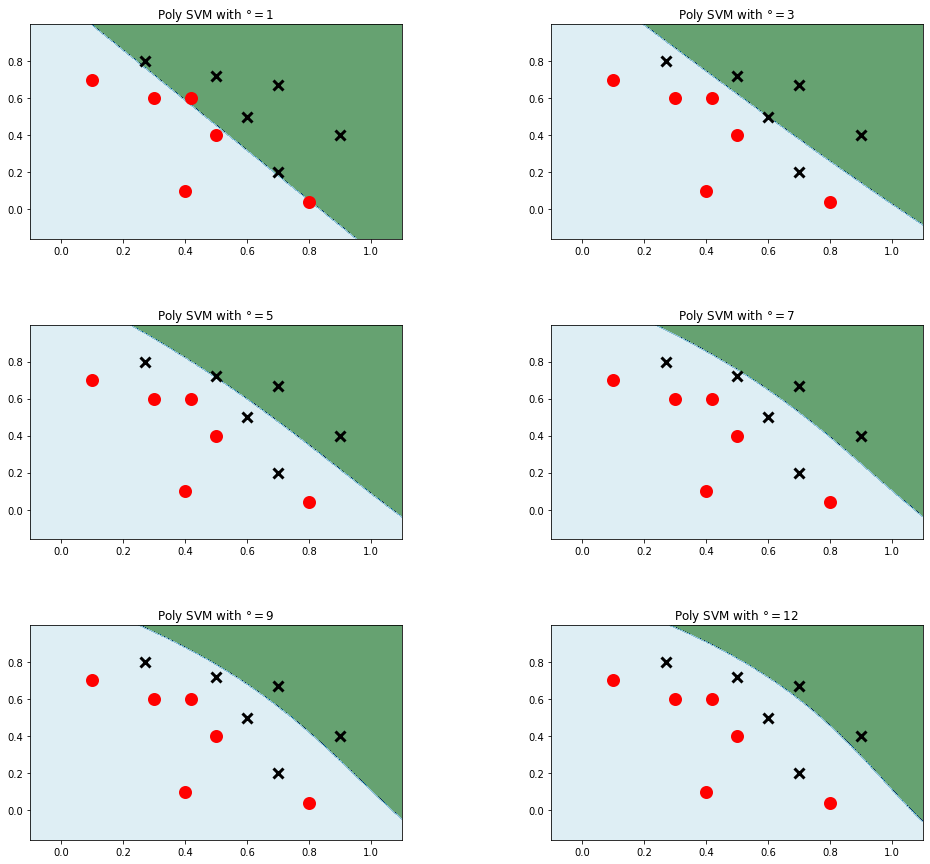

In [2]:
plt.figure(figsize=(16, 15))
 
for i, degree in enumerate([1, 3, 5, 7, 9, 12]):
    # C: 惩罚系数，gamma: 高斯核的系数
    model_poly = svm.SVC(C=0.0001, kernel='poly', degree=degree) # 多项式核
    model_poly.fit(data, label)
    # ravel - flatten
    # c_ - vstack
    # 把后面两个压扁之后变成了x1和x2，然后进行判断，得到结果在压缩成一个矩形
    Z = model_poly.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean, alpha=0.6)
 
    # 画出训练点
    plt.scatter(data[:6, 0], data[:6, 1], marker='o', color='r', s=100, lw=3)
    plt.scatter(data[6:, 0], data[6:, 1], marker='x', color='k', s=100, lw=3)
    plt.title('Poly SVM with $\degree=$' + str(degree))
plt.show()

## 高斯核SVM

对比不同gamma下的分类情况

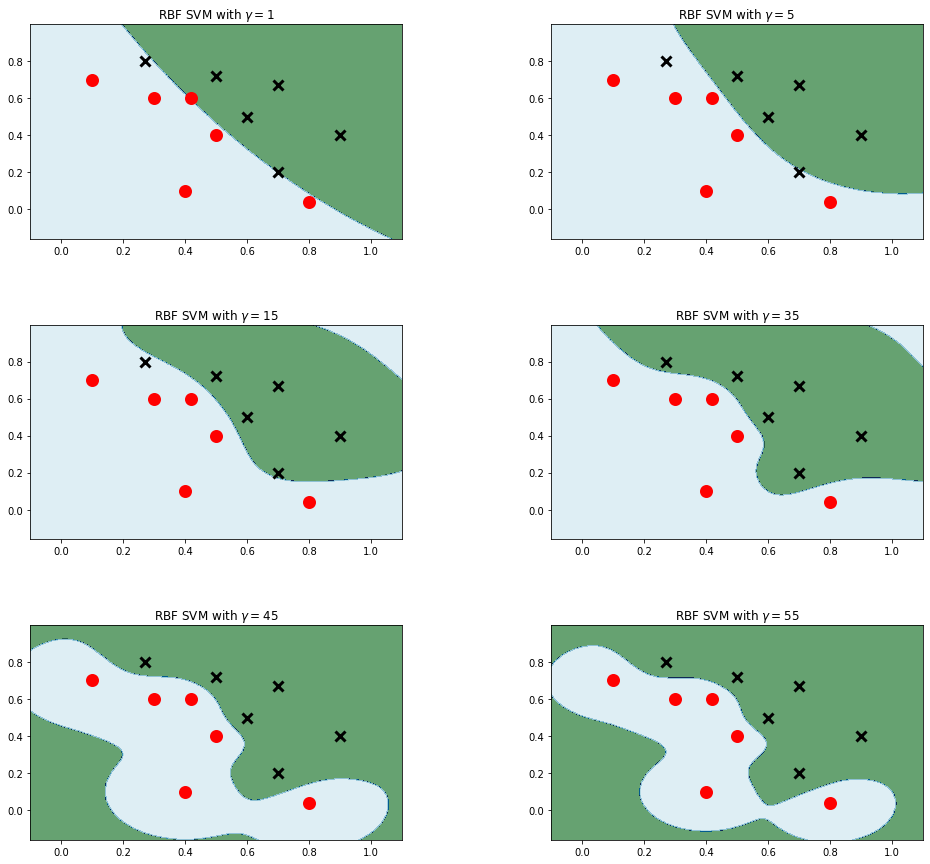

In [3]:
plt.figure(figsize=(16, 15))
 
for i, gamma in enumerate([1, 5, 15, 35, 45, 55]):
    # C: 惩罚系数，gamma: 高斯核的系数
    model_rbf = svm.SVC(kernel='rbf', gamma=gamma, C= 0.0001).fit(data, label)
 
    # ravel - flatten
    # c_ - vstack
    # 把后面两个压扁之后变成了x1和x2，然后进行判断，得到结果在压缩成一个矩形
    Z = model_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(3, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    plt.contourf(xx, yy, Z, cmap=plt.cm.ocean, alpha=0.6)
 
    # 画出训练点
    plt.scatter(data[:6, 0], data[:6, 1], marker='o', color='r', s=100, lw=3)
    plt.scatter(data[6:, 0], data[6:, 1], marker='x', color='k', s=100, lw=3)
    plt.title('RBF SVM with $\gamma=$' + str(gamma))
plt.show()

## 测试不同SVM在Mnist数据集上的分类情况

In [4]:
import sys
from pathlib import Path
curr_path = str(Path().absolute()) # 当前文件所在绝对路径
parent_path = str(Path().absolute().parent) # 父路径
sys.path.append(parent_path) # 添加路径到系统路径

from Mnist.load_data import load_local_mnist
from sklearn import svm

(X_train, y_train), (X_test, y_test) = load_local_mnist(normalize=True,one_hot=False)

# 截取部分数据，否则程序运行可能超时
X_train, y_train= X_train[:2000], y_train[:2000] 
X_test, y_test = X_test[:200],y_test[:200]

# C:软间隔惩罚系数
C_linear = 100
model_linear = svm.SVC(C = C_linear, kernel='linear').fit(X_train,y_train) # 线性核
print(f"Linear Kernel 's score: {model_linear.score(X_test,y_test)}")
for degree in range(1,10,2):
    model_poly = svm.SVC(C=100, kernel='poly', degree=degree).fit(X_train,y_train) # 多项式核
    print(f"Polynomial Kernel with Degree = {degree} 's score: {model_poly.score(X_test,y_test)}")

for gamma in range(1,10,2):
    gamma = round(0.01 * gamma,3)
    model_rbf = svm.SVC(C = 100, kernel='rbf', gamma = gamma).fit(X_train,y_train) # 高斯核
    print(f"Polynomial Kernel with Gamma = {gamma} 's score: {model_rbf.score(X_test,y_test)}")


Linear Kernel 's score: 0.955


C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Polynomial Kernel with Degree = 1 's score: 0.95


C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Polynomial Kernel with Degree = 3 's score: 0.75


C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Polynomial Kernel with Degree = 5 's score: 0.125


C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Polynomial Kernel with Degree = 7 's score: 0.12


C:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Polynomial Kernel with Degree = 9 's score: 0.12
Polynomial Kernel with Gamma = 0.01 's score: 0.96
Polynomial Kernel with Gamma = 0.03 's score: 0.96
Polynomial Kernel with Gamma = 0.05 's score: 0.945
Polynomial Kernel with Gamma = 0.07 's score: 0.9
Polynomial Kernel with Gamma = 0.09 's score: 0.835
